In [59]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import os, csv
from collections import Counter
from copy import copy
from pathlib import Path
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from datetime import date
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (14, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [60]:
pwd

'C:\\Users\\01059\\Documents\\PyCharmProjects\\MKInternshipIntro'

Directory files 

In [61]:
DIR_BASE = 'C:\\Users\\01059\\Documents\\PyCharmProjects\\MKInternshipIntro'
FILE_HISTORY = os.path.join(DIR_BASE, "Cap_price_data_for_MK.csv")
# FILE_SOMETHING_ELSE 

In [62]:
df_ = pd.read_csv(FILE_HISTORY)

In [63]:
df_.columns

Index(['Date', 'Settlement Interval', 'Spot Price', 'Exceedance'], dtype='object')

In [64]:
df_.shape

(205968, 4)

In [65]:
type(df_.values)

numpy.ndarray

In [66]:
# project a column
df_date = df_.loc[:, ['Date']]

In [67]:
# project two columns, select rows based on some condition
mask_ = df_.Exceedance > 0.
df_exceedance_true = df_.loc[mask_, ['Settlement Interval', 'Spot Price']]

Plot a histogram of spot prices for all exceedances

<AxesSubplot:>

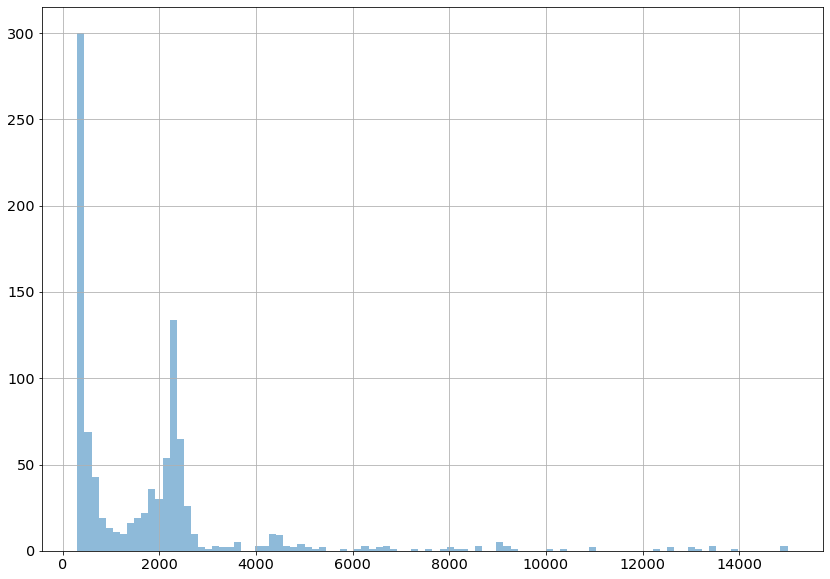

In [68]:
df_exceedance_true['Spot Price'].hist(bins=100, alpha=0.5)


Plot a histogram of settlement intervals for all exceedances

<AxesSubplot:>

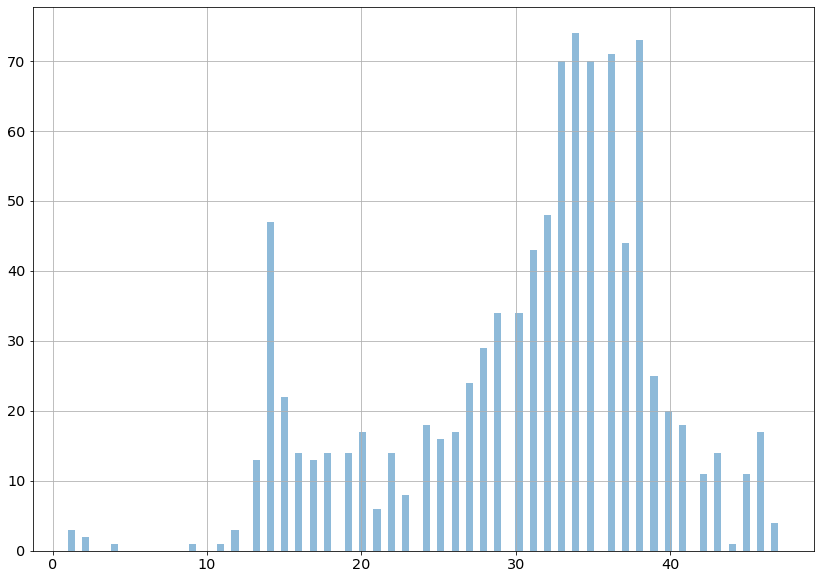

In [69]:
df_exceedance_true['Settlement Interval'].hist(bins=100, alpha=0.5)


In [70]:
def sort_and_plot(pairs):
    """ Sort and plot 2D data in order of keys"""
    sorted_pairs = sorted(pairs.values, key=lambda x : x[0])
    x = []
    y = []
    for i, j in sorted_pairs:
        x.append(i)
        y.append(j)
    plt.plot(x, y)

Text(0.5, 1.0, 'Spot Prices for Exceedances over Settlement Intervals')

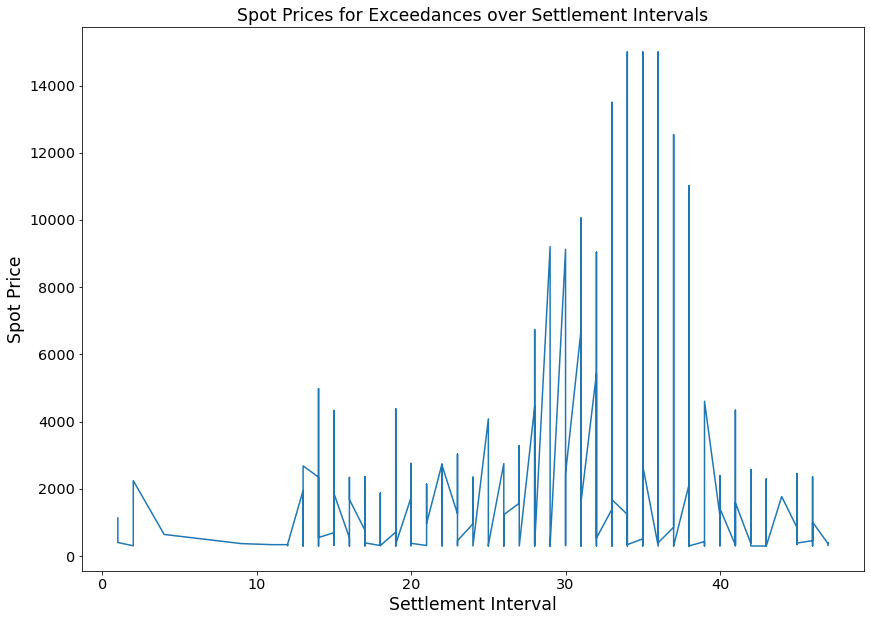

In [71]:
sort_and_plot(df_exceedance_true)
plt.xlabel("Settlement Interval")
plt.ylabel("Spot Price")
plt.title("Spot Prices for Exceedances over Settlement Intervals")

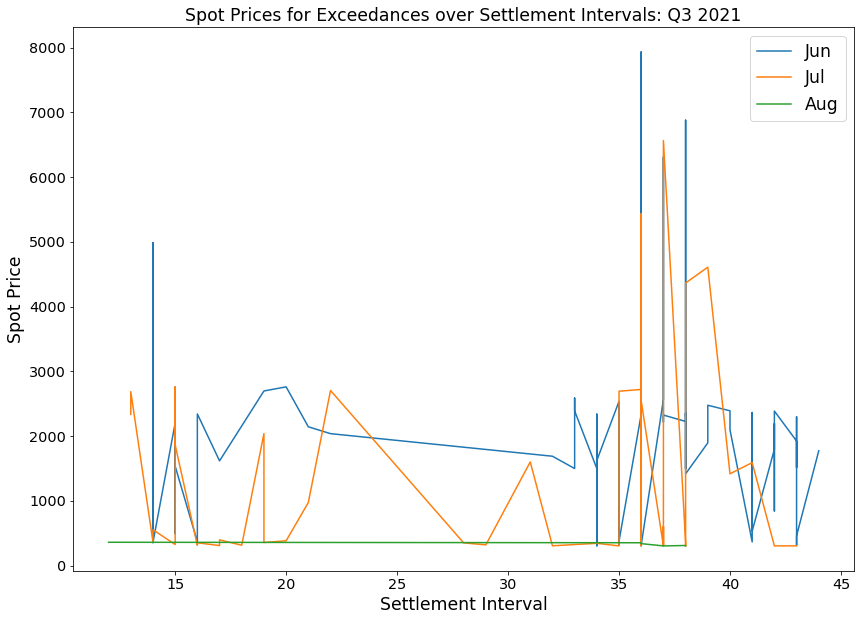

In [72]:
# Q1 Data
dec_dates = df_.loc[df_.Date.str.contains("Dec-20") & mask_, ['Settlement Interval', 'Spot Price']]
jan_dates = df_.loc[df_.Date.str.contains("Jan-21") & mask_, ['Settlement Interval', 'Spot Price']]
feb_dates = df_.loc[df_.Date.str.contains("Feb-21") & mask_, ['Settlement Interval', 'Spot Price']]

# Q3 Data
jun_dates = df_.loc[df_.Date.str.contains("Jun-21") & mask_, ['Settlement Interval', 'Spot Price']]
jul_dates = df_.loc[df_.Date.str.contains("Jul-21") & mask_, ['Settlement Interval', 'Spot Price']]
aug_dates = df_.loc[df_.Date.str.contains("Aug-21") & mask_, ['Settlement Interval', 'Spot Price']]

# Q1 Plotting
# sort_and_plot(dec_dates)
# sort_and_plot(jan_dates)
# sort_and_plot(feb_dates)
# plt.xlabel("Settlement Interval")
# plt.ylabel("Spot Price")
# plt.title("Spot Prices for Exceedances over Settlement Intervals: Q1 2021")
# plt.legend(["Dec", "Jan", "Feb"])

# Q3 Plotting
sort_and_plot(jun_dates)
sort_and_plot(jul_dates)
sort_and_plot(aug_dates)
plt.xlabel("Settlement Interval")
plt.ylabel("Spot Price")
plt.title("Spot Prices for Exceedances over Settlement Intervals: Q3 2021")
plt.legend(["Jun", "Jul", "Aug"])

In [73]:
def count_frequencies(values, current=None):
    """ Count frequency of each value in values and store in current. """
    if current is None:
        current = {}
    counts = current
    values = list(values)
    for value in values:
        if value in counts.keys():
            counts[value] += 1
        else:
            counts[value] = 1
    return counts#dict(sorted(counts.items()))

Text(0.5, 1.0, 'Exceedance Event Count For Each Settlement Interval - Q4 2020')

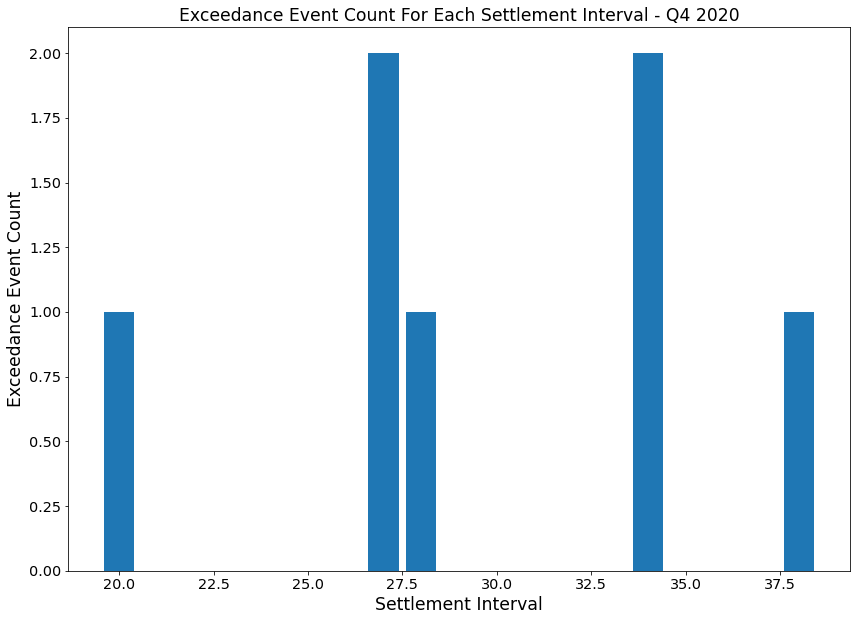

In [86]:
# Q1 Data
dec_intervals = df_.loc[df_.Date.str.contains("Dec-20") & mask_, 'Settlement Interval']
jan_intervals = df_.loc[df_.Date.str.contains("Jan-21") & mask_, 'Settlement Interval']
feb_intervals = df_.loc[df_.Date.str.contains("Feb-21") & mask_, 'Settlement Interval']

q1_counts = count_frequencies(dec_intervals)
q1_counts = count_frequencies(jan_intervals, q1_counts)
q1_counts = count_frequencies(feb_intervals, q1_counts)
q1_counts = dict(sorted(q1_counts.items()))

# Q2 Data
mar_intervals = df_.loc[df_.Date.str.contains("Mar-21") & mask_, 'Settlement Interval']
apr_intervals = df_.loc[df_.Date.str.contains("Apr-21") & mask_, 'Settlement Interval']
may_intervals = df_.loc[df_.Date.str.contains("May-21") & mask_, 'Settlement Interval']

q2_counts = count_frequencies(mar_intervals)
q2_counts = count_frequencies(apr_intervals, q2_counts)
q2_counts = count_frequencies(may_intervals, q2_counts)
q2_counts = dict(sorted(q2_counts.items()))

# Q3 Data
jun_intervals = df_.loc[df_.Date.str.contains("Jun-21") & mask_, 'Settlement Interval']
jul_intervals = df_.loc[df_.Date.str.contains("Jul-21") & mask_, 'Settlement Interval']
aug_intervals = df_.loc[df_.Date.str.contains("Aug-21") & mask_, 'Settlement Interval']

q3_counts = count_frequencies(jun_intervals)
q3_counts = count_frequencies(jul_intervals, q3_counts)
q3_counts = count_frequencies(aug_intervals, q3_counts)
q3_counts = dict(sorted(q3_counts.items()))

# Q4 Data
sep_intervals = df_.loc[df_.Date.str.contains("Sep-20") & mask_, 'Settlement Interval']
oct_intervals = df_.loc[df_.Date.str.contains("Oct-20") & mask_, 'Settlement Interval']
nov_intervals = df_.loc[df_.Date.str.contains("Nov-20") & mask_, 'Settlement Interval']

q4_counts = count_frequencies(sep_intervals)
q4_counts = count_frequencies(oct_intervals, q4_counts)
q4_counts = count_frequencies(nov_intervals, q4_counts)
q4_counts = dict(sorted(q4_counts.items()))

plt.bar(q4_counts.keys(), q4_counts.values())
plt.xlabel("Settlement Interval")
plt.ylabel("Exceedance Event Count")
plt.title("Exceedance Event Count For Each Settlement Interval - Q4 2020")

In [ ]:
DIR_BASE = '/Users/elliot/2022/cs_energy/cap_exceedance/data'
FILE_HISTORY = os.path.join(DIR_BASE, "PRICE_AND_DEMAND_202101_QLD1.csv")
# FILE_SOMETHING_ELSE 

In [ ]:
jan_21 = pd.read_csv(FILE_HISTORY)

In [ ]:
jan_21.columns

In [ ]:
def temporal_filter(spot_price_df, column_label: str ="Date", key: str ="Jan-21"):
    result_idx = []
    for idx, val in enumerate(spot_price_df.loc[:,column_label].values):
        if key in val:
            result_idx.append(idx)
    return np.array(result_idx,dtype=int)

In [ ]:
date_mask = temporal_filter(df_)

In [ ]:
jan_21_demand = jan_21.loc[:,'TOTALDEMAND'].values
jan_21_df_ = df_.loc[date_mask]
jan_21_spot_ex = jan_21_df_.loc[jan_21_df_.Exceedance>0,['Date','Settlement_Interval','Spot_Price']]

In [ ]:
jan_21_spot_ex

In [ ]:
jan_21_spot_ex.loc[:,"Date"].values[0][-9:]

In [ ]:
si_day, days = [],[]
for day in np.arange(1,32):
    days.append(str(day))
    for si in np.arange(1,49):
        if si==24 or si==48:
            si_day.append('{}_{}'.format(si,day))

In [ ]:
time = np.arange(jan_21.loc[:,'SETTLEMENTDATE'].shape[0])
plt.plot(time, jan_21_demand)
plt.plot([4,16,24,27],[])
plt.xticks(np.arange(1488)[::48],days)